In [130]:
#Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')
#sns.set_style('darkgrid')

#Loads the data and quick check
titanictrain = pd.read_csv('...Kaggle/Titanic train.csv',  dtype={"Age": np.float64}, )
titanictest = pd.read_csv('...Kaggle/Titanic test.csv',  dtype={"Age": np.float64}, )

titanictrain.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


In [131]:
#Describes the train data
titanictrain.describe()

#Another way of finding the nulls
#titanictrain.isnull().any()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [132]:
#Describes the test data
titanictest.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [133]:
titanictest.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [134]:
titanictrain.info()
print("----------------------------")
titanictest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 90.5+ KB
----------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare

In [135]:
#Cleaning up the data, part 1

#Age is missing in training data, so fill in with the median Age
titanictrain["Age"] = titanictrain["Age"].fillna(titanictrain["Age"].median())
titanictrain["Age"].median()
#Median Age is 28

#Embarked data is also missing, so fill in most common--Survived
titanictrain["Embarked"] = titanictrain["Embarked"].fillna("S")


In [136]:
#Cleaning up the data, part 2

#Cabin column missing too many data points, so drop from both sets
titanictrain.drop("Cabin",axis=1,inplace=True)
titanictest.drop("Cabin",axis=1,inplace=True)

#Drop Ticket column, unneccessary
titanictrain.drop("Ticket",axis=1,inplace=True)
titanictest.drop("Ticket",axis=1,inplace=True)


In [137]:
#Cleaning up the data for test

#Age is missing in training data, so fill in with the median Age
titanictest["Age"] = titanictest["Age"].fillna(titanictest["Age"].median())


#Embarked data is also missing, so fill in most common--Survived
titanictest["Fare"] = titanictest["Fare"].fillna(titanictest["Fare"].median())

In [138]:
#Relabel Gender:
titanictrain.loc[titanictrain["Sex"] == "male", "Sex"] = 0
titanictrain.loc[titanictrain["Sex"] == "female", "Sex"] = 1

titanictest.loc[titanictest["Sex"] == "male", "Sex"] = 0
titanictest.loc[titanictest["Sex"] == "female", "Sex"] = 1


In [139]:
#Relabel Embark Port
titanictrain.loc[titanictrain["Embarked"] == "S", "Embarked"] = 2
titanictrain.loc[titanictrain["Embarked"] == "C", "Embarked"] = 1
titanictrain.loc[titanictrain["Embarked"] == "Q", "Embarked"] = 0

titanictest.loc[titanictest["Embarked"] == "S", "Embarked"] = 2
titanictest.loc[titanictest["Embarked"] == "C", "Embarked"] = 1
titanictest.loc[titanictest["Embarked"] == "Q", "Embarked"] = 0

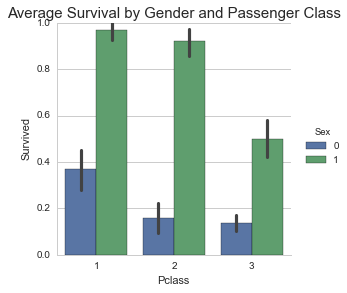

In [140]:
# average survived passengers by passenger class & gender
sns.factorplot(x="Pclass", y="Survived", hue="Sex", data=titanictrain, kind="bar")
sns.plt.title('Average Survival by Gender and Passenger Class', size=15)

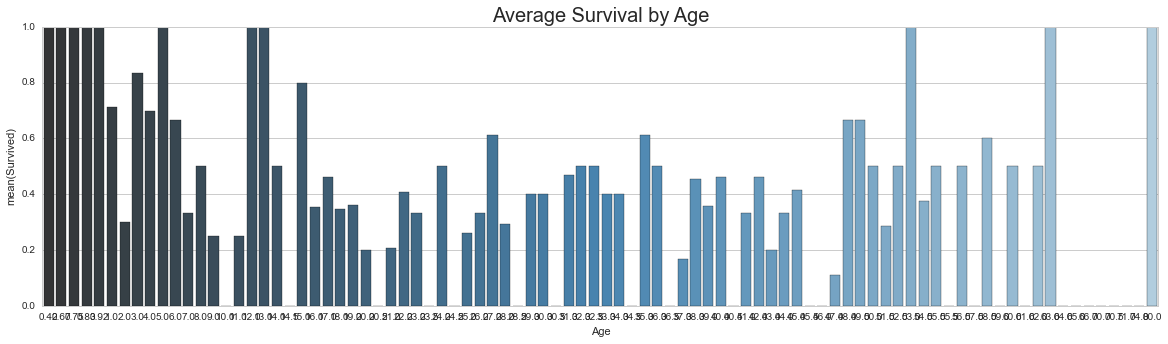

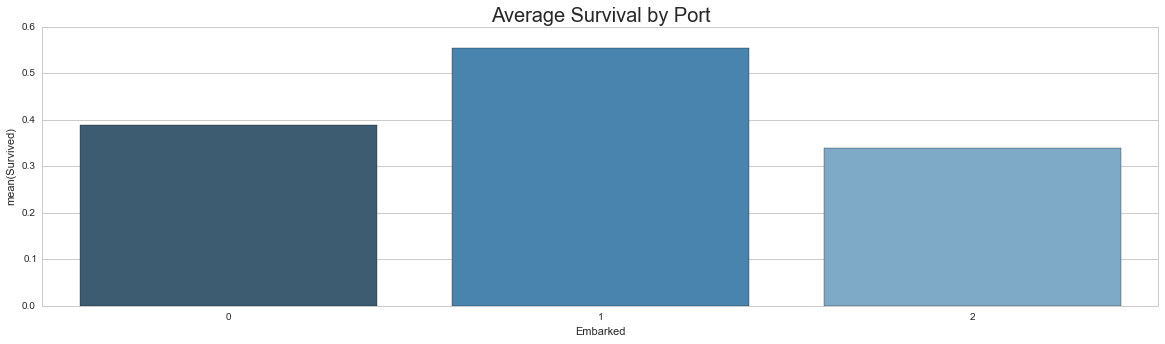

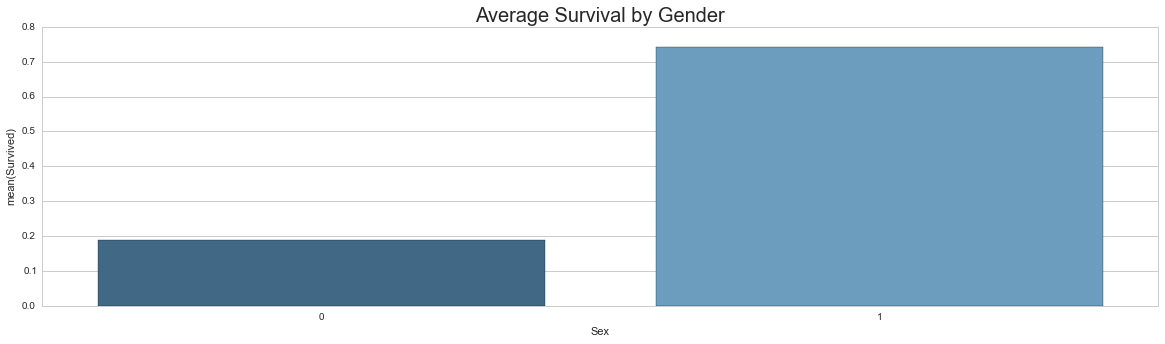

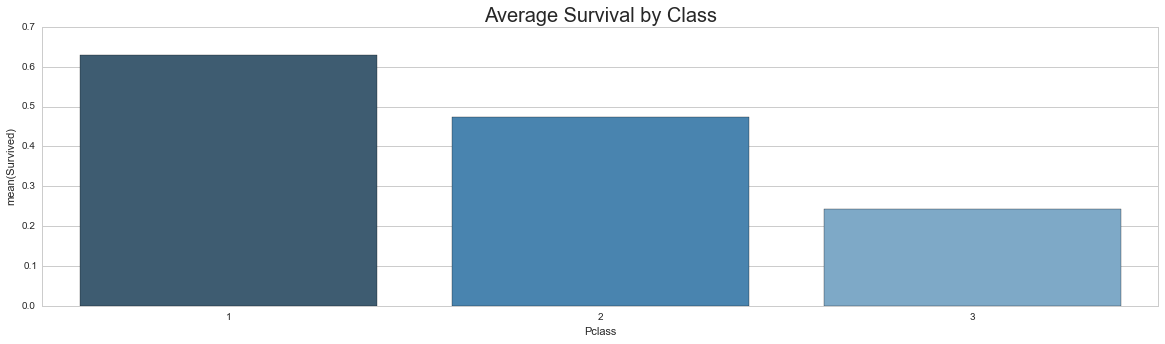

In [141]:
# average survived passengers by age
#sns.stripplot(x="Age", y="Survived", data=titanictrain, jitter=True)
fig, axis1 = plt.subplots(1,1,figsize=(20,5))
average_age = titanictrain[["Age", "Survived"]].groupby(['Age'],as_index=False).mean()
sns.barplot(x='Age', y='Survived', data=average_age, palette="Blues_d")
sns.plt.title('Average Survival by Age', size=20)

# average survived passengers by port
fig, axis1 = plt.subplots(1,1,figsize=(20,5))
average_age = titanictrain[["Embarked", "Survived"]].groupby(['Embarked'],as_index=False).mean()
sns.barplot(x='Embarked', y='Survived', data=average_age, palette="Blues_d")
sns.plt.title('Average Survival by Port', size=20)

# average survived passengers by gender
fig, axis1 = plt.subplots(1,1,figsize=(20,5))
average_age = titanictrain[["Sex", "Survived"]].groupby(['Sex'],as_index=False).mean()
sns.barplot(x='Sex', y='Survived', data=average_age, palette="Blues_d")
sns.plt.title('Average Survival by Gender', size=20)

# average survived passengers by passenger class
fig, axis1 = plt.subplots(1,1,figsize=(20,5))
average_age = titanictrain[["Pclass", "Survived"]].groupby(['Pclass'],as_index=False).mean()
sns.barplot(x='Pclass', y='Survived', data=average_age, palette="Blues_d")
sns.plt.title('Average Survival by Class', size=20)


In [142]:
def create_submission(alg, titanictrain, titanictest, predictors, filename):

    alg.fit(titanictrain[predictors], titanictrain["Survived"])
    predictions = alg.predict(titanictest[predictors])

    submission = pd.DataFrame({
        "PassengerId": titanictest["PassengerId"],
        "Survived": predictions
    })
    
    submission.to_csv(filename, index=False)

In [143]:
from sklearn.linear_model import LogisticRegression
from sklearn import cross_validation


predictors = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]

alg    = LogisticRegression(random_state=1)
scores = cross_validation.cross_val_score(
    alg,
    titanictrain[predictors],
    titanictrain["Survived"],
    cv=3
)

print(scores.mean())

0.792368125701


In [144]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import cross_validation


predictors = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]

alg = RandomForestClassifier(
    random_state=1,
    n_estimators=150,
    min_samples_split=4,
    min_samples_leaf=2
)

scores = cross_validation.cross_val_score(
    alg,
   titanictrain[predictors],
   titanictrain["Survived"],
    cv=3
)

print(scores.mean())

0.824915824916


In [145]:
#algorithm
alg

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=2, min_samples_split=4,
            min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=1,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

In [146]:
create_submission(alg, titanictrain, titanictest, predictors, "TitanicFinalPredictions.csv")